In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
train=pd.read_csv(r'C:\Users\vysha\Downloads\06a5b7de55d811ed\dataset\train.csv')
test=pd.read_csv(r'C:\Users\vysha\Downloads\06a5b7de55d811ed\dataset\test.csv')

In [3]:
train.head()

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,25355,startup_4,Iaşi (Romania),"Dec 9, 2018",Current Employee,SDE1,SDE overview,Great impact. Professional people. Chance to s...,You should be on-call according to a team rota...,None.,3.0,5.0,4.0,5.0,4.0,0,3.0
1,66963,startup_6,NaN,"May 21, 2012",Current Employee,Sales Director,Experience over 17 years has been very mixed -...,one of the best reasons to work at Microsoft i...,Microsoft has become a highly political org wi...,"Take a deep, hard look at the advertising org....",3.5,NaN,3.5,4.0,1.0,4,3.0
2,50981,startup_6,NaN,"Oct 12, 2017",Current Employee,Anonymous Employee,"Lots of shiny surface, little depth",Benefits and salary are relatively competitive,Microsoft is getting in its own way of success...,Need to deliver beyond the empty words that cu...,2.0,1.0,3.0,4.0,1.0,0,3.0
3,65337,startup_6,"Vancouver, BC (Canada)","May 7, 2015",Former Employee,Finance Intern,MAP Intern,the MAP program at Microsoft is one of the bes...,No cons to report whatsoever,keep doing what you're doing,4.0,4.0,5.0,4.0,4.0,0,3.0
4,38342,startup_2,"New York, NY","Oct 9, 2017",Current Employee,Senior Software Engineer,Dear Apple,"Supportive environment, and great food.",Lack of proximity to some low-end restaurants.,Keep it up!,5.0,5.0,5.0,5.0,5.0,0,3.0


In [4]:
train.shape

(24268, 17)

In [5]:
train.columns

Index(['ID', 'Place', 'location', 'date', 'status', 'job_title', 'summary',
       'positives', 'negatives', 'advice_to_mgmt', 'score_1', 'score_2',
       'score_3', 'score_4', 'score_5', 'score_6', 'overall'],
      dtype='object')

In [6]:
train.index

RangeIndex(start=0, stop=24268, step=1)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24268 entries, 0 to 24267
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              24268 non-null  int64  
 1   Place           24268 non-null  object 
 2   location        15336 non-null  object 
 3   date            24268 non-null  object 
 4   status          24268 non-null  object 
 5   job_title       24268 non-null  object 
 6   summary         24232 non-null  object 
 7   positives       24268 non-null  object 
 8   negatives       24268 non-null  object 
 9   advice_to_mgmt  13626 non-null  object 
 10  score_1         21711 non-null  float64
 11  score_2         19383 non-null  float64
 12  score_3         21722 non-null  float64
 13  score_4         21709 non-null  float64
 14  score_5         21467 non-null  float64
 15  score_6         24268 non-null  int64  
 16  overall         24268 non-null  float64
dtypes: float64(6), int64(2), object

In [8]:
train.isna().sum()

ID                    0
Place                 0
location           8932
date                  0
status                0
job_title             0
summary              36
positives             0
negatives             0
advice_to_mgmt    10642
score_1            2557
score_2            4885
score_3            2546
score_4            2559
score_5            2801
score_6               0
overall               0
dtype: int64

In [9]:
train.describe()

,ID,score_1,score_2,score_3,score_4,score_5,score_6,overall
count,24268.000000,21711.000000,19383.000000,21722.000000,21709.000000,21467.000000,24268.000000,24268.000000
mean,33999.512692,3.369237,3.781871,3.625587,3.938735,3.320562,1.349596,3.582743
std,19540.523891,1.301653,1.300757,1.226452,1.043806,1.313312,20.243488,1.001315
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,17104.250000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,3.000000
50%,34245.500000,3.500000,4.000000,4.000000,4.000000,3.000000,0.000000,4.000000
75%,50842.500000,4.000000,5.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,67528.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2094.000000,5.000000


In [10]:
train.nunique()

ID                24268
Place                 6
location           1226
date               3405
status                2
job_title          3331
summary           16868
positives         24042
negatives         24063
advice_to_mgmt    12908
score_1               9
score_2               5
score_3               9
score_4               9
score_5               9
score_6              64
overall               5
dtype: int64

In [11]:
test.head()

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6
0,24788,startup_4,"Seattle, WA","Sep 28, 2011",Current Employee,Anonymous Employee,company that likes geeks,Innovative CEO has long term view Great if you...,Work life balance Average pay to non-tech people,NaN,3.0,NaN,3.5,2.5,4.0,3
1,6607,startup_1,NaN,"Nov 9, 2015",Former Employee,Anonymous Employee,Engineer,"Great pay, great people. Fun time!",The tacos give you gas.,"Keep pushing for innovative ideas, as you alwa...",5.0,5.0,5.0,5.0,5.0,0
2,13591,startup_4,NaN,"Oct 25, 2017",Current Employee,Anonymous Employee,Manager in Amazon Video,"Thinking Big, and Customer Centricity",Lack of coherent business strategy / vision th...,NaN,2.0,4.0,4.0,5.0,2.0,0
3,35601,startup_5,"London, England (UK)","Oct 1, 2017",Former Employee,Business Development Manager,Great leadership,Great energy! Flexible enough...good balance. ...,Lot to work on.... Less creative.... Less inte...,NaN,3.0,5.0,4.0,4.0,5.0,0
4,35466,startup_5,"Palo Alto, CA","Oct 13, 2010",Current Employee,Anonymous Employee,Amazing place to work,"- Great, innovative company which is in the bu...",Can be a bit chaotic for someone coming form a...,You are doing an awesome job...just don't stop...,5.0,NaN,5.0,5.0,5.0,0


In [12]:
test.shape

(6068, 16)

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              6068 non-null   int64  
 1   Place           6068 non-null   object 
 2   location        3746 non-null   object 
 3   date            6068 non-null   object 
 4   status          6068 non-null   object 
 5   job_title       6068 non-null   object 
 6   summary         6052 non-null   object 
 7   positives       6068 non-null   object 
 8   negatives       6068 non-null   object 
 9   advice_to_mgmt  3433 non-null   object 
 10  score_1         5439 non-null   float64
 11  score_2         4903 non-null   float64
 12  score_3         5445 non-null   float64
 13  score_4         5436 non-null   float64
 14  score_5         5384 non-null   float64
 15  score_6         6068 non-null   int64  
dtypes: float64(5), int64(2), object(9)
memory usage: 758.6+ KB


In [16]:
test.isna().sum()

ID                   0
Place                0
location          2322
date                 0
status               0
job_title            0
summary             16
positives            0
negatives            0
advice_to_mgmt    2635
score_1            629
score_2           1165
score_3            623
score_4            632
score_5            684
score_6              0
dtype: int64

In [17]:
test.describe()

,ID,score_1,score_2,score_3,score_4,score_5,score_6
count,6068.000000,5439.000000,4903.000000,5445.000000,5436.000000,5384.000000,6068.000000
mean,33994.963415,3.375345,3.796247,3.647842,3.964956,3.329959,1.544001
std,19370.346574,1.303409,1.297885,1.222717,1.039874,1.320298,25.468271
min,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,17538.250000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,33638.000000,3.500000,4.000000,4.000000,4.000000,3.500000,0.000000
75%,51128.750000,4.000000,5.000000,5.000000,5.000000,4.000000,1.000000
max,67504.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1404.000000


# Missing Values

In [14]:
# checking the percentage of nan values present in each feature
features_with_na=[features for features in train.columns if train[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(train[feature].isnull().mean(), 4),  ' % missing values')

location 0.3681  % missing values
summary 0.0015  % missing values
advice_to_mgmt 0.4385  % missing values
score_1 0.1054  % missing values
score_2 0.2013  % missing values
score_3 0.1049  % missing values
score_4 0.1054  % missing values
score_5 0.1154  % missing values


## Numerical features

In [18]:
# list of numerical variables
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train[numerical_features].head()

Number of numerical variables:  8


,ID,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,25355,3.0,5.0,4.0,5.0,4.0,0,3.0
1,66963,3.5,NaN,3.5,4.0,1.0,4,3.0
2,50981,2.0,1.0,3.0,4.0,1.0,0,3.0
3,65337,4.0,4.0,5.0,4.0,4.0,0,3.0
4,38342,5.0,5.0,5.0,5.0,5.0,0,3.0


## Categorical features

In [19]:
# list of categorical variables
categorical_features = [feature for feature in train.columns if train[feature].dtypes =='O']

print('Number of categorical variables: ', len(categorical_features))

# visualise the categorical variables
train[categorical_features].head()

Number of categorical variables:  9


,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt
0,startup_4,Iaşi (Romania),"Dec 9, 2018",Current Employee,SDE1,SDE overview,Great impact. Professional people. Chance to s...,You should be on-call according to a team rota...,None.
1,startup_6,NaN,"May 21, 2012",Current Employee,Sales Director,Experience over 17 years has been very mixed -...,one of the best reasons to work at Microsoft i...,Microsoft has become a highly political org wi...,"Take a deep, hard look at the advertising org...."
2,startup_6,NaN,"Oct 12, 2017",Current Employee,Anonymous Employee,"Lots of shiny surface, little depth",Benefits and salary are relatively competitive,Microsoft is getting in its own way of success...,Need to deliver beyond the empty words that cu...
3,startup_6,"Vancouver, BC (Canada)","May 7, 2015",Former Employee,Finance Intern,MAP Intern,the MAP program at Microsoft is one of the bes...,No cons to report whatsoever,keep doing what you're doing
4,startup_2,"New York, NY","Oct 9, 2017",Current Employee,Senior Software Engineer,Dear Apple,"Supportive environment, and great food.",Lack of proximity to some low-end restaurants.,Keep it up!


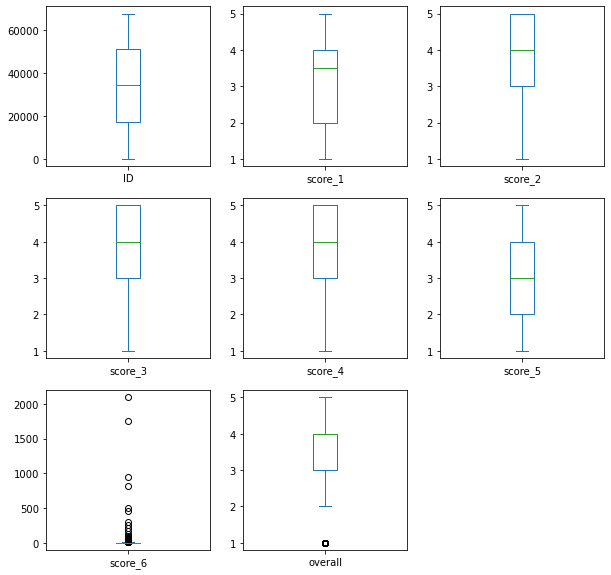

In [20]:
train.plot(kind ='box', subplots =True,sharex =True,sharey= False, layout = (3,3), figsize=(10,10))
plt.show()

### Handling of missing values

In [21]:
train.isna().sum()

ID                    0
Place                 0
location           8932
date                  0
status                0
job_title             0
summary              36
positives             0
negatives             0
advice_to_mgmt    10642
score_1            2557
score_2            4885
score_3            2546
score_4            2559
score_5            2801
score_6               0
overall               0
dtype: int64

In [22]:
train['location'].value_counts()

Redmond, WA          2016
Seattle, WA          1768
Hyderabad (India)     768
Mountain View, CA     614
Bengaluru (India)     564
                     ... 
Long Beach, CA          1
Carnegie, PA            1
Eastvale, PA            1
Germantown, TN          1
Vellore (India)         1
Name: location, Length: 1226, dtype: int64

In [24]:
# since location is a categorical feature, it is replaced with most frequent category
train['location']=train['location'].fillna(train['location'].mode()[0])
train['location'].isna().sum()

0

In [25]:
#for 'advice_to_mgmt' there are 13277 missing values which is huge so filling it with a new catogory variable'unknown'
train['advice_to_mgmt']=train['advice_to_mgmt'].fillna('Unknown')
train['advice_to_mgmt'].isna().sum()

0

In [27]:
train.groupby(['status'])['score_1'].median()

status
Current Employee     4.0
Former Employee      3.0
Name: score_1, dtype: float64

In [29]:
#missing values can be filled with median for each class
train['score_1'] = train['score_1'].fillna(train.groupby('status')['score_1'].transform('median'))

In [30]:
train.groupby(['status'])['score_2'].median()

status
Current Employee     4.0
Former Employee      4.0
Name: score_2, dtype: float64

In [31]:
cols=['score_4','score_2','score_3','score_5']
for i in cols:
    train[i] = train[i].fillna(train.groupby('status')[i].transform('median'))

In [32]:
train.isnull().sum()

ID                 0
Place              0
location           0
date               0
status             0
job_title          0
summary           36
positives          0
negatives          0
advice_to_mgmt     0
score_1            0
score_2            0
score_3            0
score_4            0
score_5            0
score_6            0
overall            0
dtype: int64

In [34]:
train['summary'].value_counts()

Great place to work                              245
Great company                                    188
Software Engineer                                171
Great Company                                    140
Good                                             139
                                                ... 
Apple Senior Technical Advisor                     1
Collaborative team with lots of career growth      1
International Revenue Allocation Analyst           1
One of the best environment to learn.              1
Amazon Great Company To Work At                    1
Name: summary, Length: 16868, dtype: int64

In [35]:
train['summary']=train['summary'].fillna('Unknown')

In [36]:
train.isnull().sum()

ID                0
Place             0
location          0
date              0
status            0
job_title         0
summary           0
positives         0
negatives         0
advice_to_mgmt    0
score_1           0
score_2           0
score_3           0
score_4           0
score_5           0
score_6           0
overall           0
dtype: int64

### Handling outliers

In [37]:
from scipy.stats.mstats import winsorize

train['score_6'] = winsorize(train["score_6"], limits = 0.01)

In [38]:
#converting categorical columns to numerical
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Place','location','date','status','job_title','summary','positives','negatives','advice_to_mgmt']:
    train[i]=le.fit_transform(train[i])

In [39]:
#Handling missing values in test data
# since location is a categorical feature, it is replaced with most frequent category
test['location']=test['location'].fillna(test['location'].mode()[0])
test['location'].isna().sum()

0

In [40]:
test['advice_to_mgmt']=test['advice_to_mgmt'].fillna('Unknown')
test['advice_to_mgmt'].isna().sum()

0

In [41]:
test['score_1'] = test['score_1'].fillna(test.groupby('status')['score_1'].transform('median'))

In [42]:
cols=['score_4','score_2','score_3','score_5']
for i in cols:
    test[i] = test[i].fillna(test.groupby('status')[i].transform('median'))

In [43]:
test['summary']=test['summary'].fillna('Unknown')

In [44]:
test.isna().sum()

ID                0
Place             0
location          0
date              0
status            0
job_title         0
summary           0
positives         0
negatives         0
advice_to_mgmt    0
score_1           0
score_2           0
score_3           0
score_4           0
score_5           0
score_6           0
dtype: int64

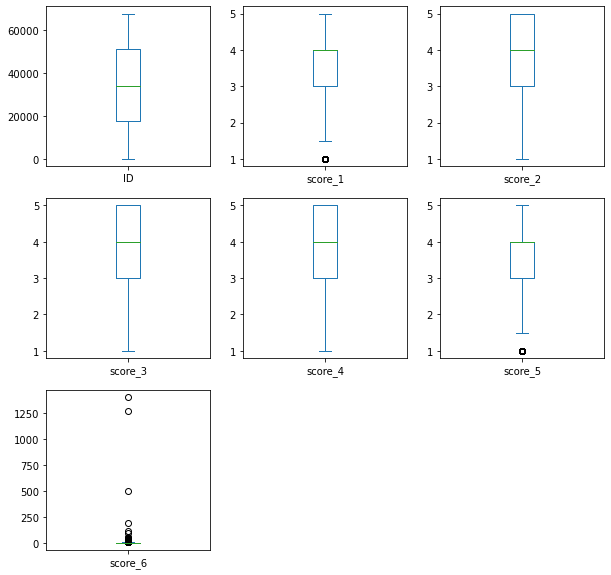

In [45]:
test.plot(kind ='box', subplots =True,sharex =True,sharey= False, layout = (3,3), figsize=(10,10))
plt.show()

In [46]:
test['score_6'] = winsorize(test["score_6"], limits = 0.01)

In [47]:
#converting categorical columns to numerical
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Place','location','date','status','job_title','summary','positives','negatives','advice_to_mgmt']:
    test[i]=le.fit_transform(test[i])

In [48]:
train.head()

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,25355,3,491,853,0,2194,12457,10360,20304,7354,3.0,5.0,4.0,5.0,4.0,0,3.0
1,66963,5,903,2354,0,2250,4251,23242,10255,9661,3.5,4.0,3.5,4.0,1.0,4,3.0
2,50981,5,903,2841,0,149,9643,3240,10285,7143,2.0,1.0,3.0,4.0,1.0,0,3.0
3,65337,5,1137,2504,1,967,9777,23572,10991,12036,4.0,4.0,5.0,4.0,4.0,0,3.0
4,38342,1,753,3106,0,2597,3406,17397,8397,5361,5.0,5.0,5.0,5.0,5.0,0,3.0


In [49]:
test.head()

,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6
0,24788,3,481,2317,0,56,4404,3329,4953,2776,3.0,4.0,3.5,2.5,4.0,3
1,6607,0,427,1940,1,56,1102,2779,4265,1432,5.0,5.0,5.0,5.0,5.0,0
2,13591,3,427,2068,0,56,2735,4836,2140,2776,2.0,4.0,4.0,5.0,2.0,0
3,35601,4,299,1949,1,131,1980,2649,2419,2776,3.0,5.0,4.0,4.0,5.0,0
4,35466,4,393,1971,0,56,257,155,797,2879,5.0,4.0,5.0,5.0,5.0,0


<function matplotlib.pyplot.show(close=None, block=None)>

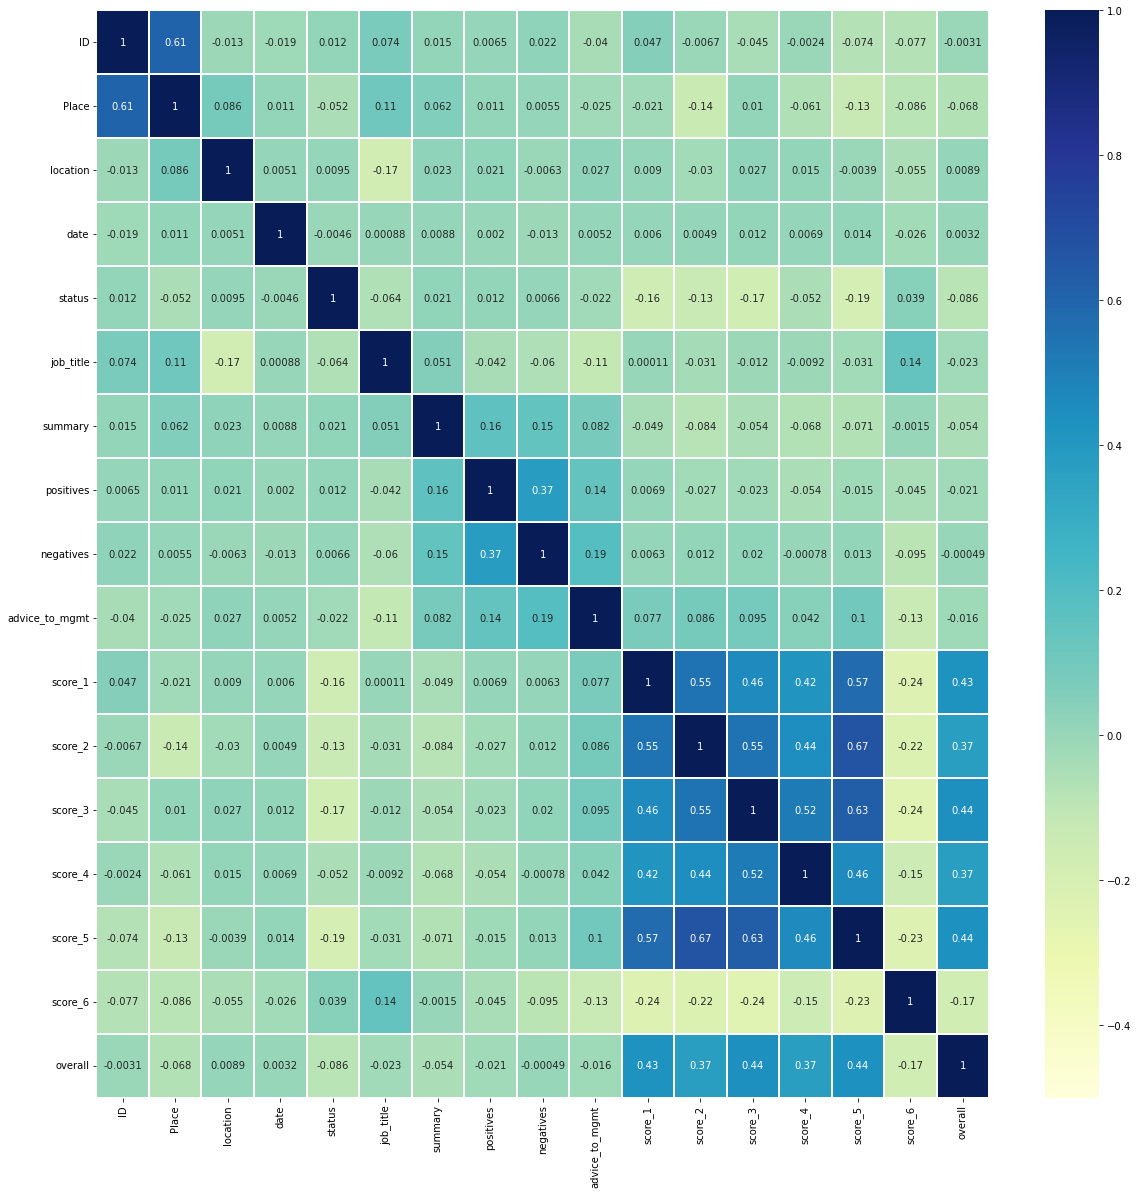

In [50]:
corr=train.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr,vmin=-0.5,vmax=1,annot=True,linewidth=0.2,cmap="YlGnBu")
plt.show

In [51]:
x=train.drop(['overall'],axis=1)
y=train['overall']

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [53]:
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix

### Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc_model=rfc.fit(x_train,y_train)
rfc_pred=rfc_model.predict(x_test)

In [64]:
confusion_matrix(y_test, rfc_pred)

array([[  14,   34,   53,   18,    4],
       [   5,  137,  441,  154,    8],
       [   4,  137,  772,  802,  154],
       [   2,   55,  670, 1080,  311],
       [   0,    2,  204,  655,  351]], dtype=int64)

In [65]:
acc_rfc= accuracy_score(y_test, rfc_pred)*100
acc_rfc

38.80006593044338

In [67]:
print("f1 score is: ",f1_score(y_test, rfc_pred,average='micro'))

f1 score is:  0.38800065930443384


### Gaussian Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb_model= gnb.fit(x_train,y_train)
y_pred_gnb= gnb_model.predict(x_test)

In [70]:
print("f1 score is: ",f1_score(y_test, rfc_pred,average='micro'))

f1 score is:  0.38800065930443384


In [71]:
predict=rfc_model.predict(test)

In [72]:
predict

array([4., 4., 3., ..., 4., 4., 4.])

In [73]:
predict1=pd.DataFrame([test['ID'],predict])

In [74]:
predict1

,0,1,2,3,4,5,6,7,8,9,...,6058,6059,6060,6061,6062,6063,6064,6065,6066,6067
ID,24788.0,6607.0,13591.0,35601.0,35466.0,40599.0,19101.0,24235.0,3482.0,6960.0,...,9864.0,18173.0,59813.0,56228.0,6727.0,7202.0,42589.0,40828.0,20392.0,29140.0
Unnamed 0,4.0,4.0,3.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,...,4.0,5.0,3.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0


In [75]:
predict1=predict1.transpose()
predict1

,ID,Unnamed 0
0,24788.0,4.0
1,6607.0,4.0
2,13591.0,3.0
3,35601.0,4.0
4,35466.0,5.0
...,...,...
6063,7202.0,4.0
6064,42589.0,5.0
6065,40828.0,4.0
6066,20392.0,4.0


In [78]:
predict1.rename(columns={'Unnamed 0': 'overall'}, inplace=True)

In [79]:
predict1['overall'].value_counts()

4.0    3434
3.0    1517
5.0     847
2.0     252
1.0      18
Name: overall, dtype: int64